In [17]:
import pandas

In [18]:
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from geopandas_view import view
plt.rcParams['figure.figsize'] = [20,10]

In [19]:
graduation = pandas.read_parquet('correctgradrates.parquet')

In [20]:
graduation.shape

(58, 7)

In [21]:
dropout = pandas.read_parquet('dropout_count.parquet')

In [22]:
dropout.head()

,Dropout_Count
CountyName,
Alameda,67080.0
Amador,336.0
Butte,12754.0
Calaveras,774.0
Colusa,820.0


In [23]:
dropout.shape

(58, 1)

In [24]:
grad_rates=dropout.merge(graduation,left_on="CountyName",right_on="CountyName")

In [25]:
grad_rates.head()

,Dropout_Count,Unnamed: 0,Unnamed: 0.1,CountyCode,DistrictCode,SchoolCode,Regular HS Diploma Graduates (Rate),Dropoutrate
CountyName,,,,,,,,
Alameda,67080.0,55058.786260,55058.786260,1.0,58955.743928,214044.350660,80.133171,10.740965
Amador,336.0,46067.993902,46067.993902,3.0,51356.797834,231815.176895,80.229825,3.787719
Butte,12754.0,51652.976656,51652.976656,4.0,52482.102397,463580.839506,78.057168,15.140088
Calaveras,774.0,48949.265722,48949.265722,5.0,46217.943831,814737.532598,87.612575,5.551497
Colusa,820.0,44884.890925,44884.890925,6.0,55662.107692,367130.161538,89.476074,7.255215


In [26]:
grad_rates.shape

(58, 8)

In [27]:
grad_rates.head()

,Dropout_Count,Unnamed: 0,Unnamed: 0.1,CountyCode,DistrictCode,SchoolCode,Regular HS Diploma Graduates (Rate),Dropoutrate
CountyName,,,,,,,,
Alameda,67080.0,55058.786260,55058.786260,1.0,58955.743928,214044.350660,80.133171,10.740965
Amador,336.0,46067.993902,46067.993902,3.0,51356.797834,231815.176895,80.229825,3.787719
Butte,12754.0,51652.976656,51652.976656,4.0,52482.102397,463580.839506,78.057168,15.140088
Calaveras,774.0,48949.265722,48949.265722,5.0,46217.943831,814737.532598,87.612575,5.551497
Colusa,820.0,44884.890925,44884.890925,6.0,55662.107692,367130.161538,89.476074,7.255215


In [28]:
graduation=graduation.reset_index()

In [29]:
from geosnap import datasets

In [30]:
counties=datasets.counties()

In [31]:
fips=pandas.read_csv("https://raw.githubusercontent.com/kjhealy/us-county/master/data/census/fips-by-state.csv",converters={"fips":str},encoding="latin1")

In [32]:
counties=counties.merge(fips,left_on="geoid",right_on="fips")

In [33]:
counties.name=counties.name.apply(lambda x:x[:-7])

In [34]:
counties=counties.merge(graduation, left_on="name", right_on="CountyName",how="right")

In [35]:
counties=counties[counties.state=="CA"]

In [36]:
counties.head()

,geoid,geometry,fips,name,state,CountyName,Unnamed: 0,Unnamed: 0.1,CountyCode,DistrictCode,SchoolCode,Regular HS Diploma Graduates (Rate),Dropoutrate
0,06001,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",06001,Alameda,CA,Alameda,55058.786260,55058.786260,1.0,58955.743928,214044.350660,80.133171,10.740965
1,06005,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",06005,Amador,CA,Amador,46067.993902,46067.993902,3.0,51356.797834,231815.176895,80.229825,3.787719
3,06007,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",06007,Butte,CA,Butte,51652.976656,51652.976656,4.0,52482.102397,463580.839506,78.057168,15.140088
5,06009,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",06009,Calaveras,CA,Calaveras,48949.265722,48949.265722,5.0,46217.943831,814737.532598,87.612575,5.551497
6,06011,"POLYGON ((-122.08018 39.41420, -122.07996 39.4...",06011,Colusa,CA,Colusa,44884.890925,44884.890925,6.0,55662.107692,367130.161538,89.476074,7.255215


In [37]:
counties['fips'] = [v[2:] for v in counties.fips.values]

In [38]:
counties.head()

,geoid,geometry,fips,name,state,CountyName,Unnamed: 0,Unnamed: 0.1,CountyCode,DistrictCode,SchoolCode,Regular HS Diploma Graduates (Rate),Dropoutrate
0,06001,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",001,Alameda,CA,Alameda,55058.786260,55058.786260,1.0,58955.743928,214044.350660,80.133171,10.740965
1,06005,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",005,Amador,CA,Amador,46067.993902,46067.993902,3.0,51356.797834,231815.176895,80.229825,3.787719
3,06007,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",007,Butte,CA,Butte,51652.976656,51652.976656,4.0,52482.102397,463580.839506,78.057168,15.140088
5,06009,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",009,Calaveras,CA,Calaveras,48949.265722,48949.265722,5.0,46217.943831,814737.532598,87.612575,5.551497
6,06011,"POLYGON ((-122.08018 39.41420, -122.07996 39.4...",011,Colusa,CA,Colusa,44884.890925,44884.890925,6.0,55662.107692,367130.161538,89.476074,7.255215


In [39]:
counties.fips=counties.fips.astype(float)

In [40]:
counties.shape

(57, 13)

In [41]:
counties.columns

Index(['geoid', 'geometry', 'fips', 'name', 'state', 'CountyName',
       'Unnamed: 0', 'Unnamed: 0.1', 'CountyCode', 'DistrictCode',
       'SchoolCode', 'Regular HS Diploma Graduates (Rate)', 'Dropoutrate'],
      dtype='object')

In [45]:
counties.rename(columns={"Regular HS Diploma Graduates (Rate)":"hsgradrate"},inplace=True)

## Graduation Visuals

<AxesSubplot:>

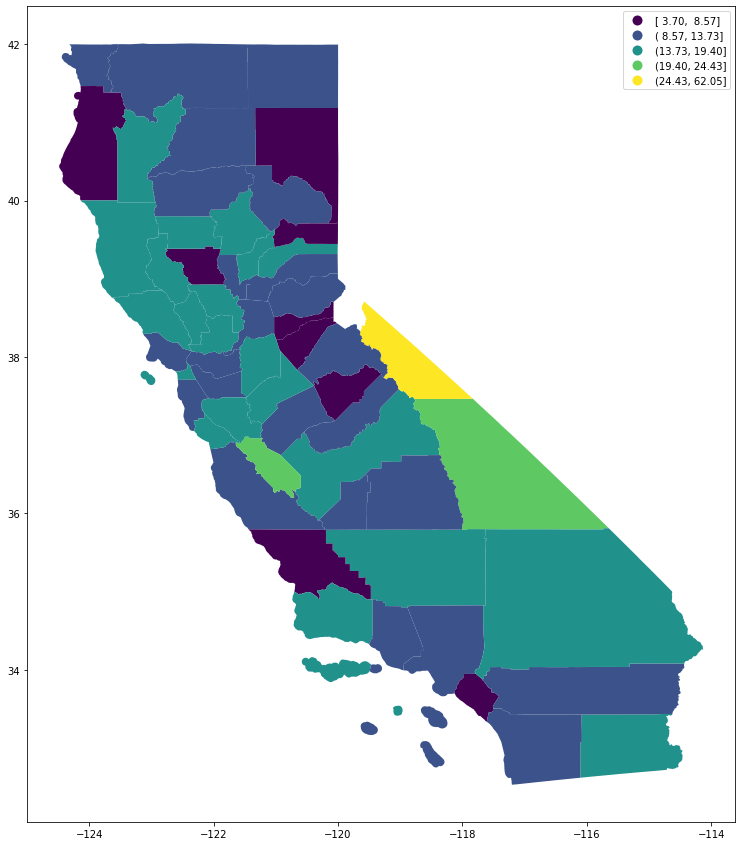

In [46]:
counties.plot(column='Dropoutrate', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

<AxesSubplot:>

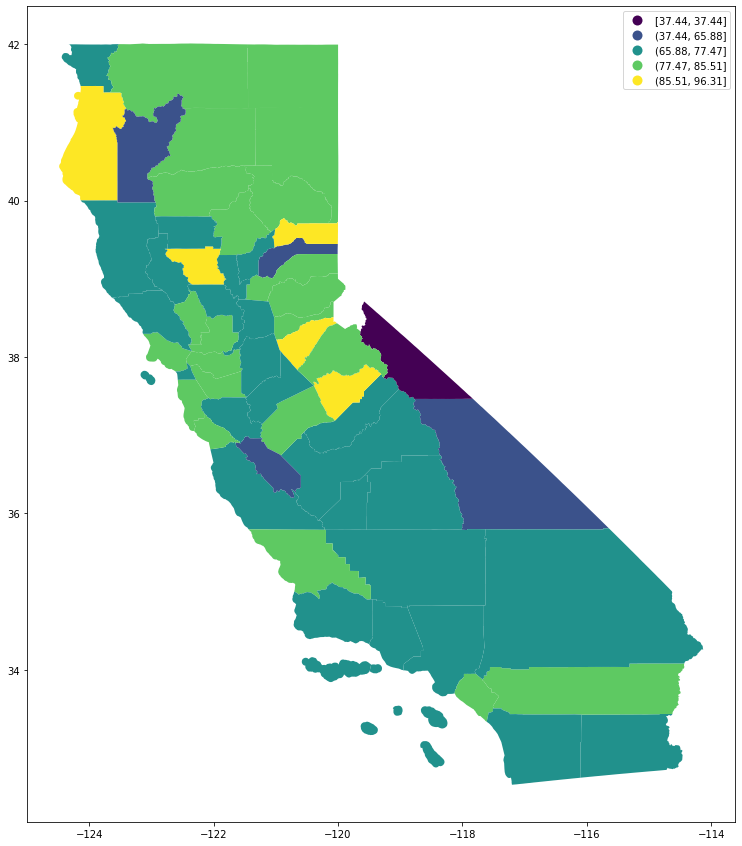

In [47]:
counties.plot(column='hsgradrate', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

In [48]:
counties.shape

(57, 13)

In [49]:
counties.head()

,geoid,geometry,fips,name,state,CountyName,Unnamed: 0,Unnamed: 0.1,CountyCode,DistrictCode,SchoolCode,hsgradrate,Dropoutrate
0,06001,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",1.0,Alameda,CA,Alameda,55058.786260,55058.786260,1.0,58955.743928,214044.350660,80.133171,10.740965
1,06005,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",5.0,Amador,CA,Amador,46067.993902,46067.993902,3.0,51356.797834,231815.176895,80.229825,3.787719
3,06007,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",7.0,Butte,CA,Butte,51652.976656,51652.976656,4.0,52482.102397,463580.839506,78.057168,15.140088
5,06009,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",9.0,Calaveras,CA,Calaveras,48949.265722,48949.265722,5.0,46217.943831,814737.532598,87.612575,5.551497
6,06011,"POLYGON ((-122.08018 39.41420, -122.07996 39.4...",11.0,Colusa,CA,Colusa,44884.890925,44884.890925,6.0,55662.107692,367130.161538,89.476074,7.255215


In [50]:
income = gpd.read_parquet('./income/ca_tract_incomes.parquet')

In [51]:
income.head()

,GEOID,median_household_income,median_home_value,per_capita_income,geometry
0,06037554001,55703.0,450200.0,23331.0,"POLYGON ((5987925.784 2275112.258, 5988249.105..."
1,06037554002,56452.0,461200.0,22520.0,"POLYGON ((5987299.089 2275049.015, 5987348.882..."
2,06037554101,42969.0,453200.0,19127.0,"POLYGON ((5992628.264 2276367.468, 5992690.382..."
3,06037554103,81480.0,460200.0,34880.0,"POLYGON ((5992635.820 2276956.239, 5992710.707..."
4,06037554104,63625.0,464800.0,20344.0,"POLYGON ((5993599.563 2274986.574, 5993703.488..."


In [52]:
income["county"]=[code[2:5] for code in income.GEOID.values]

In [53]:
income.head()

,GEOID,median_household_income,median_home_value,per_capita_income,geometry,county
0,06037554001,55703.0,450200.0,23331.0,"POLYGON ((5987925.784 2275112.258, 5988249.105...",037
1,06037554002,56452.0,461200.0,22520.0,"POLYGON ((5987299.089 2275049.015, 5987348.882...",037
2,06037554101,42969.0,453200.0,19127.0,"POLYGON ((5992628.264 2276367.468, 5992690.382...",037
3,06037554103,81480.0,460200.0,34880.0,"POLYGON ((5992635.820 2276956.239, 5992710.707...",037
4,06037554104,63625.0,464800.0,20344.0,"POLYGON ((5993599.563 2274986.574, 5993703.488...",037


In [54]:
countyincome_average=income.groupby(by='county').mean()

In [55]:
countyincome_average.shape

(58, 3)

In [56]:
countyincome_average.head()

,median_household_income,median_home_value,per_capita_income
county,,,
001,98936.975000,699858.432584,45224.541667
003,64688.000000,349000.000000,29041.000000
005,61656.444444,298988.888889,30229.777778
007,50684.764706,253241.176471,26936.000000
009,55489.900000,297550.000000,36696.600000


In [57]:
countyincome_average.columns

Index(['median_household_income', 'median_home_value', 'per_capita_income'], dtype='object')

In [58]:
countyincome_average.reset_index(level=0,inplace=True)

In [59]:
countyincome_average.head()

,county,median_household_income,median_home_value,per_capita_income
0,001,98936.975000,699858.432584,45224.541667
1,003,64688.000000,349000.000000,29041.000000
2,005,61656.444444,298988.888889,30229.777778
3,007,50684.764706,253241.176471,26936.000000
4,009,55489.900000,297550.000000,36696.600000


In [60]:
countyincome_average["county"] = countyincome_average["county"]
print(countyincome_average)

   county  median_household_income  median_home_value  per_capita_income
0     001             98936.975000       6.998584e+05       45224.541667
1     003             64688.000000       3.490000e+05       29041.000000
2     005             61656.444444       2.989889e+05       30229.777778
3     007             50684.764706       2.532412e+05       26936.000000
4     009             55489.900000       2.975500e+05       36696.600000
5     011             55385.200000       2.405400e+05       27744.800000
6     013            103459.053140       6.142169e+05       46677.198068
7     015             43263.714286       1.892143e+05       21846.285714
8     017             83436.166667       4.364024e+05       39484.595238
9     019             54711.323232       2.208549e+05       23676.623116
10    021             48764.833333       2.435833e+05       24863.833333
11    023             46979.566667       3.113767e+05       27085.133333
12    025             45908.032258       1.643333e+

In [61]:
countyincome_average.dtypes

county                      object
median_household_income    float64
median_home_value          float64
per_capita_income          float64
dtype: object

In [62]:
import numpy as np

In [63]:
countyincome_average.county=countyincome_average.county.astype(float)

In [64]:
countyincome_average.head()

,county,median_household_income,median_home_value,per_capita_income
0,1.0,98936.975000,699858.432584,45224.541667
1,3.0,64688.000000,349000.000000,29041.000000
2,5.0,61656.444444,298988.888889,30229.777778
3,7.0,50684.764706,253241.176471,26936.000000
4,9.0,55489.900000,297550.000000,36696.600000


In [65]:
countyincome_average.isna()

,county,median_household_income,median_home_value,per_capita_income
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [66]:
avg_countyinc_grad=counties.merge(countyincome_average, left_on="fips", right_on="county", how="left")

In [67]:
avg_countyinc_grad.head()

,geoid,geometry,fips,name,state,CountyName,Unnamed: 0,Unnamed: 0.1,CountyCode,DistrictCode,SchoolCode,hsgradrate,Dropoutrate,county,median_household_income,median_home_value,per_capita_income
0,06001,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",1.0,Alameda,CA,Alameda,55058.786260,55058.786260,1.0,58955.743928,214044.350660,80.133171,10.740965,1.0,98936.975000,699858.432584,45224.541667
1,06005,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",5.0,Amador,CA,Amador,46067.993902,46067.993902,3.0,51356.797834,231815.176895,80.229825,3.787719,5.0,61656.444444,298988.888889,30229.777778
2,06007,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",7.0,Butte,CA,Butte,51652.976656,51652.976656,4.0,52482.102397,463580.839506,78.057168,15.140088,7.0,50684.764706,253241.176471,26936.000000
3,06009,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",9.0,Calaveras,CA,Calaveras,48949.265722,48949.265722,5.0,46217.943831,814737.532598,87.612575,5.551497,9.0,55489.900000,297550.000000,36696.600000
4,06011,"POLYGON ((-122.08018 39.41420, -122.07996 39.4...",11.0,Colusa,CA,Colusa,44884.890925,44884.890925,6.0,55662.107692,367130.161538,89.476074,7.255215,11.0,55385.200000,240540.000000,27744.800000


In [68]:
avg_countyinc_grad.to_parquet('avg_income.parquet')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  """Entry point for launching an IPython kernel.


In [69]:
avg_countyinc_grad.head()

,geoid,geometry,fips,name,state,CountyName,Unnamed: 0,Unnamed: 0.1,CountyCode,DistrictCode,SchoolCode,hsgradrate,Dropoutrate,county,median_household_income,median_home_value,per_capita_income
0,06001,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",1.0,Alameda,CA,Alameda,55058.786260,55058.786260,1.0,58955.743928,214044.350660,80.133171,10.740965,1.0,98936.975000,699858.432584,45224.541667
1,06005,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",5.0,Amador,CA,Amador,46067.993902,46067.993902,3.0,51356.797834,231815.176895,80.229825,3.787719,5.0,61656.444444,298988.888889,30229.777778
2,06007,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",7.0,Butte,CA,Butte,51652.976656,51652.976656,4.0,52482.102397,463580.839506,78.057168,15.140088,7.0,50684.764706,253241.176471,26936.000000
3,06009,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",9.0,Calaveras,CA,Calaveras,48949.265722,48949.265722,5.0,46217.943831,814737.532598,87.612575,5.551497,9.0,55489.900000,297550.000000,36696.600000
4,06011,"POLYGON ((-122.08018 39.41420, -122.07996 39.4...",11.0,Colusa,CA,Colusa,44884.890925,44884.890925,6.0,55662.107692,367130.161538,89.476074,7.255215,11.0,55385.200000,240540.000000,27744.800000


In [70]:
latino_county = pandas.read_parquet('latino.parquet')

In [71]:
latino_county.head()

,Latino
county,
001,369061.0
003,105.0
005,5132.0
007,36358.0
009,5297.0


In [72]:
latino_county.reset_index(level=0,inplace=True)

In [73]:
latino_county['county'] = [v[1:] for v in latino_county.county.values]

In [74]:
latino_county.head()

,county,Latino
0,01,369061.0
1,03,105.0
2,05,5132.0
3,07,36358.0
4,09,5297.0


In [75]:
latino_county.dtypes

county     object
Latino    float64
dtype: object

In [76]:
latino_county["county"]=latino_county["county"].astype(float)

In [77]:
finalvisual=latino_county.merge(avg_countyinc_grad, left_on="county", right_on="fips", how="left")

In [78]:
finalvisual.head()

,county_x,Latino,geoid,geometry,fips,name,state,CountyName,Unnamed: 0,Unnamed: 0.1,CountyCode,DistrictCode,SchoolCode,hsgradrate,Dropoutrate,county_y,median_household_income,median_home_value,per_capita_income
0,1.0,369061.0,06001,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",1.0,Alameda,CA,Alameda,55058.786260,55058.786260,1.0,58955.743928,214044.350660,80.133171,10.740965,1.0,98936.975000,699858.432584,45224.541667
1,3.0,105.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,5132.0,06005,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",5.0,Amador,CA,Amador,46067.993902,46067.993902,3.0,51356.797834,231815.176895,80.229825,3.787719,5.0,61656.444444,298988.888889,30229.777778
3,7.0,36358.0,06007,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",7.0,Butte,CA,Butte,51652.976656,51652.976656,4.0,52482.102397,463580.839506,78.057168,15.140088,7.0,50684.764706,253241.176471,26936.000000
4,9.0,5297.0,06009,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",9.0,Calaveras,CA,Calaveras,48949.265722,48949.265722,5.0,46217.943831,814737.532598,87.612575,5.551497,9.0,55489.900000,297550.000000,36696.600000


## Income Visuals

<AxesSubplot:>

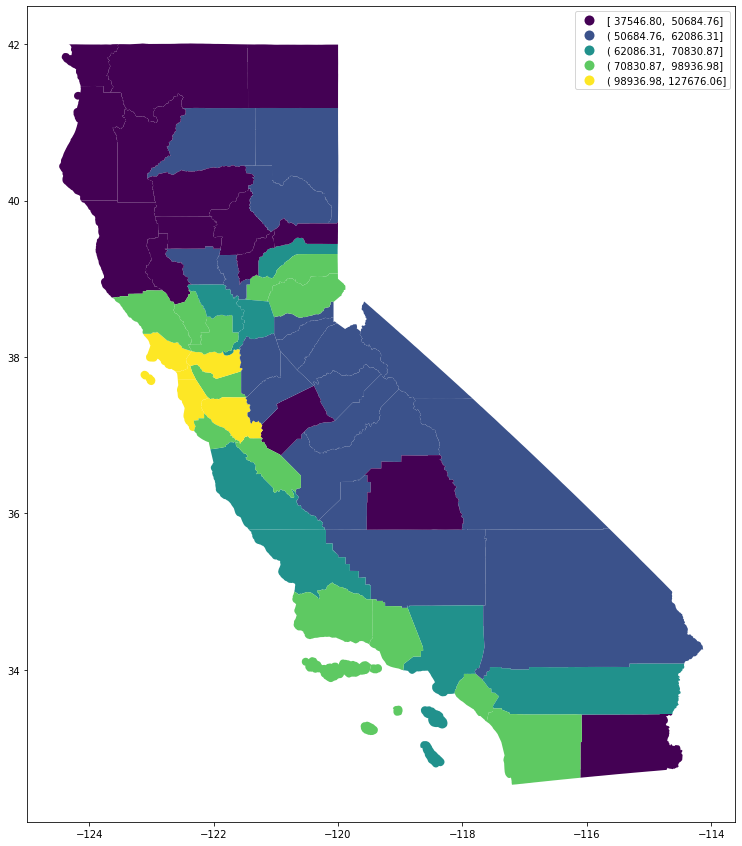

In [81]:
avg_countyinc_grad.plot(column='median_household_income', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

<AxesSubplot:>

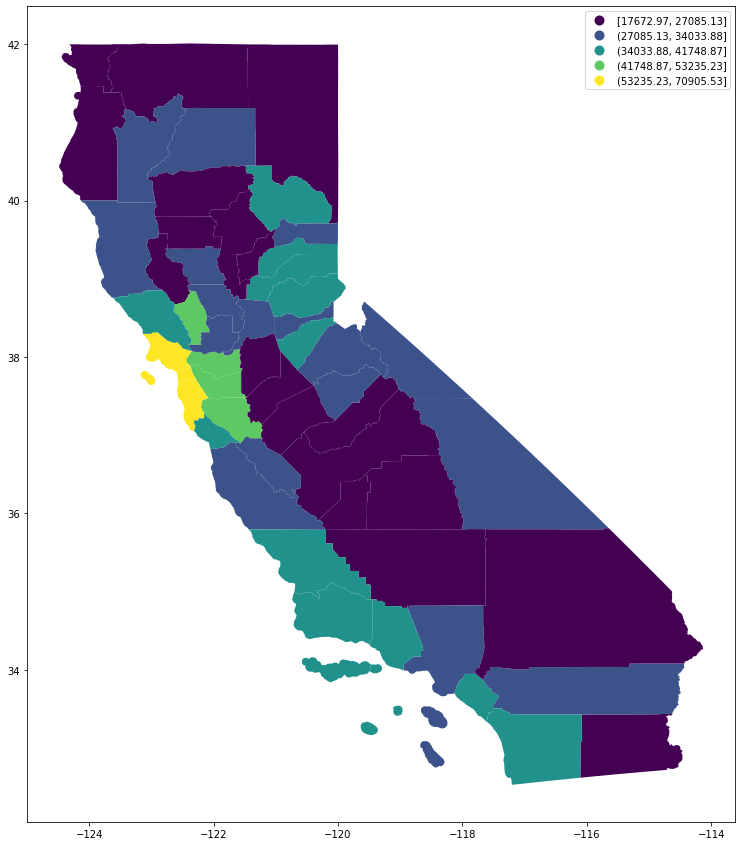

In [95]:
avg_countyinc_grad.plot(column='per_capita_income', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

<AxesSubplot:>

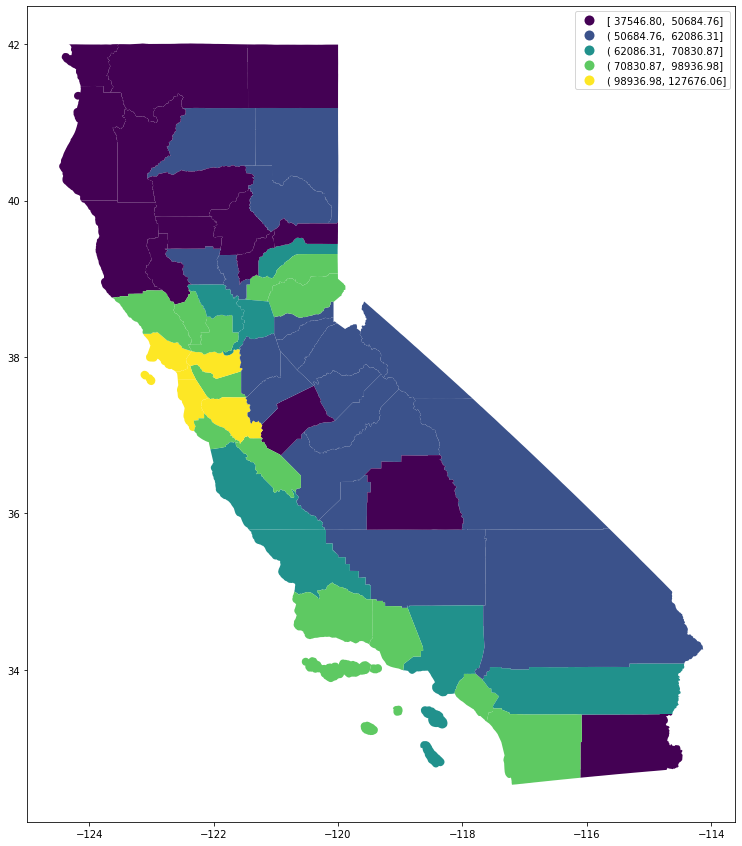

In [96]:
avg_countyinc_grad.plot(column='median_household_income', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

In [82]:
avg_countyinc_grad.shape

(57, 17)

In [89]:
racevisuals = gpd.read_parquet('race_dem_rates.parquet')

In [90]:
racevisuals.head()

,GEOID,NAMELSAD,CountyName,geometry,total_mf_10_19,median_household_income,white,black,amind,asian,nh_pi,two_or_more,total_pop,white_rate,black_rate,amind_rate,asian_rate,nh_pi_rate,two_or_more_rate
0,06091,Sierra County,Sierra,"POLYGON ((-120.65559 39.69356, -120.65552 39.6...",294.0,48125.0,2890.0,6.0,25.0,0.0,0.0,9.0,2930.0,0.986348,0.002048,0.008532,0.000000,0.000000,0.003072
1,06067,Sacramento County,Sacramento,"POLYGON ((-121.18857 38.71431, -121.18731 38.7...",196932.0,21635098.0,875793.0,149064.0,10340.0,235474.0,16715.0,107565.0,1510023.0,0.579987,0.098716,0.006848,0.155941,0.011069,0.071234
2,06083,Santa Barbara County,Santa Barbara,"MULTIPOLYGON (((-120.73429 34.90069, -120.7343...",64685.0,6803252.0,344026.0,8626.0,4389.0,23863.0,814.0,19996.0,443738.0,0.775291,0.019439,0.009891,0.053777,0.001834,0.045063
3,06009,Calaveras County,Calaveras,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",4245.0,554899.0,41375.0,302.0,492.0,568.0,126.0,1825.0,45235.0,0.914668,0.006676,0.010877,0.012557,0.002785,0.040345
4,06111,Ventura County,Ventura,"MULTIPOLYGON (((-119.32922 34.22784, -119.3292...",116814.0,15141748.0,680197.0,14835.0,7069.0,61772.0,1771.0,37561.0,848112.0,0.802013,0.017492,0.008335,0.072835,0.002088,0.044288


In [91]:
totalpop = racevisuals[['geometry','total_pop','GEOID']]

In [92]:
totalpop.head()

,geometry,total_pop,GEOID
0,"POLYGON ((-120.65559 39.69356, -120.65552 39.6...",2930.0,06091
1,"POLYGON ((-121.18857 38.71431, -121.18731 38.7...",1510023.0,06067
2,"MULTIPOLYGON (((-120.73429 34.90069, -120.7343...",443738.0,06083
3,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",45235.0,06009
4,"MULTIPOLYGON (((-119.32922 34.22784, -119.3292...",848112.0,06111
